In [25]:
#import tensorflow as tf
import numpy as np
import pandas as pd
import sys
sys.path.append('~/PycharmProjects/feedforwardNet/')
import ffnet



#pth = "/Users/gvalmerbr/Downloads/Music/"
pth = "./"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read data:

In [2]:
data,target,frm,it,desc = ffnet.loadData(pth)
data[data != 0] = np.log10(data[data !=0])+9
data[data<0]=0

Set feed forward network dimensions

In [42]:
nn_dim = [data.shape[1],2000,1000,500,target.shape[1]]
print nn_dim
opts = {'batch_size': 100,
 'display_step': 1,
 'learning_rate': 0.001,
 'training_epochs': 100}

[1707, 2000, 1000, 500, 348]


Build neural net

In [43]:
ffnet.tf.reset_default_graph
saver =ffnet.tf.train.Saver()
pred, x, y, hidden = ffnet.create_ffnn(nn_dim)


Build cost and set optimizer

In [44]:
       # cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
#pred_do = tf.nn.dropout(pred,0.2)
cost = ffnet.tf.losses.mean_squared_error(y, pred)
#cost = ffnet.tf.metrics.mean_cosine_distance(y, pred,0)
optimizer = ffnet.tf.train.AdamOptimizer(learning_rate=opts['learning_rate']).minimize(cost)

initialize and stack up together, pred, cost and optimizer

In [45]:
init = ffnet.tf.global_variables_initializer()
ffnet.sess.run(init)
nnet ={'x':x,'y':y,'cost':cost,'optimizer':optimizer,'pred':pred}

Train!

In [46]:
opts['training_epochs'] = 300
tf = ffnet.nn_train(data,target,nnet,opts)

('Epoch:', '0001', 'cost=', '471.204747871')
('Epoch:', '0002', 'cost=', '59.182244330')
('Epoch:', '0003', 'cost=', '2.193981382')
('Epoch:', '0004', 'cost=', '0.083005804')
('Epoch:', '0005', 'cost=', '0.075824128')
('Epoch:', '0006', 'cost=', '0.077019482')
('Epoch:', '0007', 'cost=', '0.078010080')
('Epoch:', '0008', 'cost=', '0.078466116')
('Epoch:', '0009', 'cost=', '0.078538753')
('Epoch:', '0010', 'cost=', '0.077835045')
('Epoch:', '0011', 'cost=', '0.077377291')
('Epoch:', '0012', 'cost=', '0.076749845')
('Epoch:', '0013', 'cost=', '0.076257095')
('Epoch:', '0014', 'cost=', '0.075670750')
('Epoch:', '0015', 'cost=', '0.075637727')
('Epoch:', '0016', 'cost=', '0.075226974')
('Epoch:', '0017', 'cost=', '0.075043490')
('Epoch:', '0018', 'cost=', '0.074831441')
('Epoch:', '0019', 'cost=', '0.074592041')
('Epoch:', '0020', 'cost=', '0.074536965')
('Epoch:', '0021', 'cost=', '0.074303718')
('Epoch:', '0022', 'cost=', '0.074288639')
('Epoch:', '0023', 'cost=', '0.074207916')
('Epoch:

KeyboardInterrupt: 

In [47]:
d = data[:,:]
p = pred.eval(feed_dict={x: d})

final_cost = cost.eval(feed_dict={x: d,y:target[:,:]})
print("Cost = ",final_cost)
print("max of pred = ",p.max())


('Cost = ', 0.070680648)
('max of pred = ', 4.3017836)


In [ ]:
ffnet.sess.run([hidden[1],hidden[2]],feed_dict={x: d})

<IPython.core.display.Javascript object>


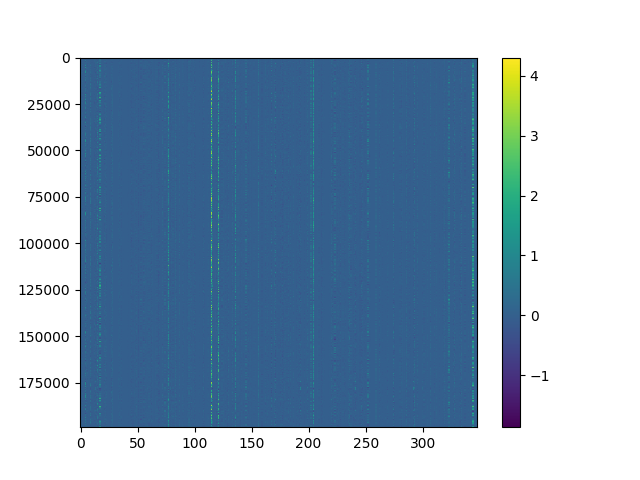

(array([25986]), array([115]))


In [48]:

import matplotlib.pyplot as plt

%matplotlib notebook
fig=plt.figure()
h=plt.imshow(p,aspect='auto')
fig.colorbar(h,orientation='vertical')
print np.nonzero(p==p.max())

In [52]:
r = pd.DataFrame(np.transpose(p[10000]),index=desc)
print r.shape
r.nlargest(18,0)

(348, 1)


,0
AROMATIC,1.455561
WOODY,1.041347
CITRUS,1.009964
FLORAL,0.964007
GREEN,0.917523
LAVENDER,0.727512
PINE,0.537529
ALDEHYDIC,0.525063
FOUGERE,0.516947
SPICY,0.515547


In [51]:
r = pd.DataFrame(np.transpose(target[10000]),index=desc)
print r.shape
r.nlargest(3,0)

(348, 1)


,0
PINE,4.0
ALDEHYDIC,3.5
ACACIA,0.0


In [53]:
s = 'OlfModel_' + '_'.join(str(d) for d in nn_dim) + '_err='+ '%.2f' % (final_cost)+'.tf'
print "saving", s
saver.save(ffnet.sess, "./saved_model/"+ s)
print 'done'

saving OlfModel_1707_2000_1000_500_348_err=0.07.tf
done


In [41]:
!jupyter nbconvert --to script LearnOlfModel_from_RM.ipynb

[NbConvertApp] Converting notebook LearnOlfModel_from_RM.ipynb to script
[NbConvertApp] Writing 2551 bytes to LearnOlfModel_from_RM.py


In [ ]:
v =l1.read_value()

In [ ]:
v.shape

In [ ]:
print v


In [ ]:
print ffnet.getSlice(data,target,10)

In [ ]:
e =target-p
me =sum(sum(e**2))/e.shape[0]
print me

In [ ]:
print hidden
